# Customer Segmentation for Credit Card Marketing Strategy #
## Context & Objective ##
* In this task, the aim is to develop a customer segmentation strategy for credit cards. The dataset contains information on approximately 9,000 active credit card holders over the past 6 months. Each customer is described by 18 behavioral variables.

* The primary objective is to orperfm **cluster analysis** to identify key attributes that define credit card usage behavior. By doing so, we can tailor credit card services to maximize customer engagement and satisfaction.

* The end goal is to analyze the data, group the behavioral variables based on the provided attributes, and share insights about the characteristics of each cusmer t group.

The following is the Data Dictionary for the dataset :

    * CUST_ID: Identification of Credit Card holder.
	* BALANCE: Balance amount left in their account to make purchases.
	* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
	* PURCHASES: Amount of purchases made from account.
	* ONEOFF_PURCHASES: Maximum purchase amount done in one-go.
	* INSTALLMENTS_PURCHASES: Amount of purchase done in installment.
	* CASH_ADVANCE: Cash in advance given by the user.
	* PURCHASES_FREQUENCY:  How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
	* ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
	* PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
	* CASHADVANCEFREQUENCY: How frequently the cash in advance being paid.
	* CASHADVANCETRX: Number of Transactions made with "Cash in Advance"
	* PURCHASES_TRX: Numbe of purchase transactions made.
	* CREDIT_LIMIT: Limit of Credit Card for user.
	* PAYMENTS: Amount of Payment done by user.
	* MINIMUM_PAYMENTS: Minimum amount of payments made by user
	* PRCFULLPAYMENT: Percent of full payment paid by user
	* TENURE: Tenure of credit card service for user.for userbilities)

### Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
sns.set_theme(style='darkgrid')

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset into memory as df

df = pd.read_csv("CreditCardData.csv")

In [3]:
df.shape

(8950, 18)

**Observations**

* The dataset has 8950 rows and 18 columns.

In [4]:
# viewing 10 random rows of the data

df.sample(5, random_state=1).T

,4248,7432,4668,5339,2031
CUST_ID,C14366,C17635,C14795,C15491,C12094
BALANCE,570.657071,578.795795,8248.178009,5.168354,876.577775
BALANCE_FREQUENCY,1.0,0.545455,1.0,0.181818,1.0
PURCHASES,950.39,994.12,1788.84,69.0,1029.94
ONEOFF_PURCHASES,540.36,105.0,0.0,29.0,0.0
INSTALLMENTS_PURCHASES,410.03,889.12,1788.84,40.0,1029.94
CASH_ADVANCE,340.308868,2578.563752,90.031207,0.0,0.0
PURCHASES_FREQUENCY,0.833333,0.833333,1.0,0.083333,1.0
ONEOFF_PURCHASES_FREQUENCY,0.416667,0.166667,0.0,0.083333,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.333333,0.833333,1.0,0.083333,1.0


In [5]:
# checking datatypes and number of non-null values for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Observations**

- `CUST_ID` is the only categorical variable.
- All the other columns in the data are numeric in nature.

In [6]:
# checking for duplicate values

df.duplicated().sum()

0

**Observations**

- There are no duplicate values in the data.

In [7]:
# Checking for missing values and sorting in descending order

missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

## Observations
- There are **313** missing values in the dataset for `MINIMUM_PAYMENTS` and **1** missing value for `CREDIT_LIMIT`.

In [8]:
# Replace missing values with 0

df['MINIMUM_PAYMENTS'].fillna(0, inplace=True)
df['CREDIT_LIMIT'].fillna(0, inplace=True)
print("Missing values replaced with 0 successfully.")

Missing values replaced with 0 successfully.


In [9]:
# rechecking for missing values and sorting in descending order

missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

## Observations
- There are no longer any missing values in the dataset

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C10001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,8950.0,NaN,NaN,NaN,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,NaN,NaN,NaN,0.877271,0.236904,0.0,0.888889,1.0,1.0,1.0
PURCHASES,8950.0,NaN,NaN,NaN,1003.204834,2136.634782,0.0,39.635,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,NaN,NaN,NaN,592.437371,1659.887917,0.0,0.0,38.0,577.405,40761.25
INSTALLMENTS_PURCHASES,8950.0,NaN,NaN,NaN,411.067645,904.338115,0.0,0.0,89.0,468.6375,22500.0
CASH_ADVANCE,8950.0,NaN,NaN,NaN,978.871112,2097.163877,0.0,0.0,0.0,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.490351,0.401371,0.0,0.083333,0.5,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.202458,0.298336,0.0,0.0,0.083333,0.3,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,NaN,NaN,NaN,0.364437,0.397448,0.0,0.0,0.166667,0.75,1.0


### Univariate analysis

#### Graphical Plots of some key values in dataset

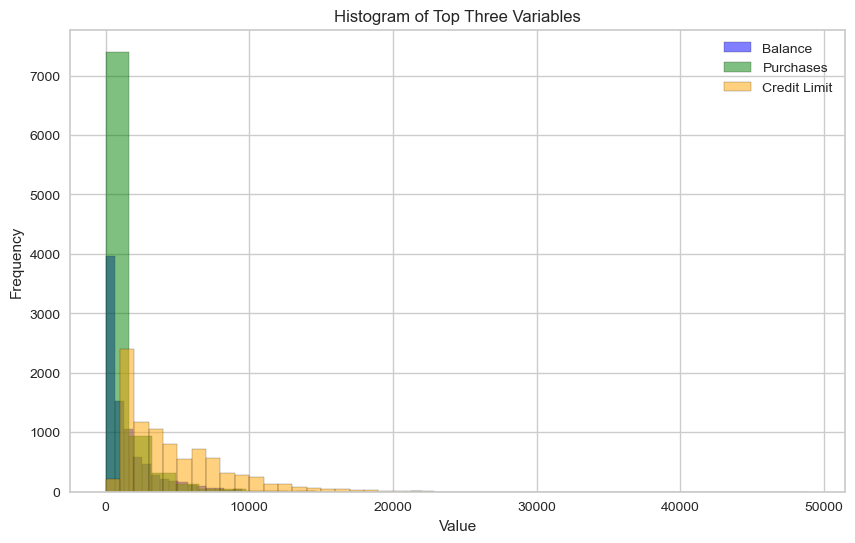

In [11]:
# Histogram of top three variables

plt.figure(figsize=(10, 6))

# Histograms of BALANCE, PURCHASES, and CREDIT_LIMIT
plt.hist(df['BALANCE'], bins=30, color='blue', edgecolor='black', alpha=0.5, label='Balance')
plt.hist(df['PURCHASES'], bins=30, color='green', edgecolor='black', alpha=0.5, label='Purchases')
plt.hist(df['CREDIT_LIMIT'], bins=30, color='orange', edgecolor='black', alpha=0.5, label='Credit Limit')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Top Three Variables')
plt.legend()
plt.grid(True)
plt.show()


## Observations
- Purchases, Balances and credit limits are mostly in the value range of 0 to 10,000

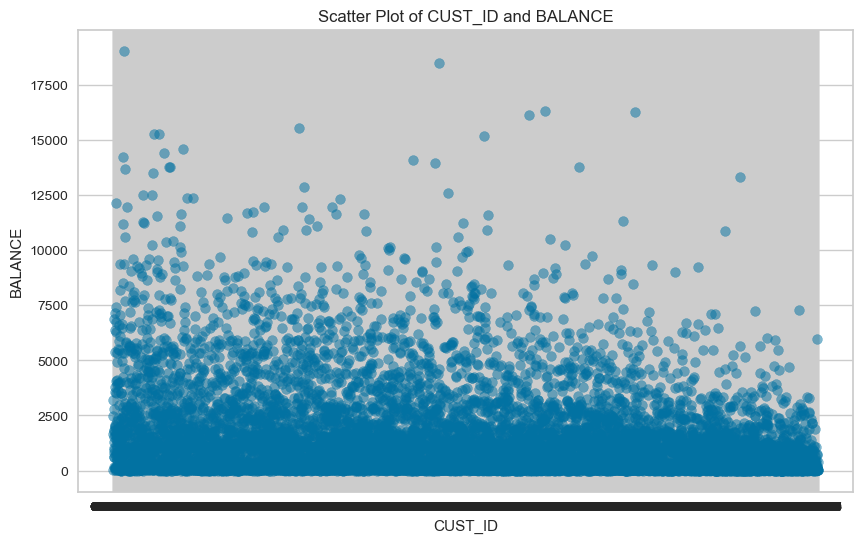

In [12]:
# Scatter plot for CUST_ID and BALANCE
plt.figure(figsize=(10, 6))
plt.scatter(df['CUST_ID'], df['BALANCE'], s=50, alpha=0.5)

# Customize the plot
plt.xlabel('CUST_ID')
plt.ylabel('BALANCE')
plt.title('Scatter Plot of CUST_ID and BALANCE')

# Show the plot
plt.grid(True)
plt.show()


## Observations
- Most balances are in the range of 7500 and below

### Bivariate Analysis

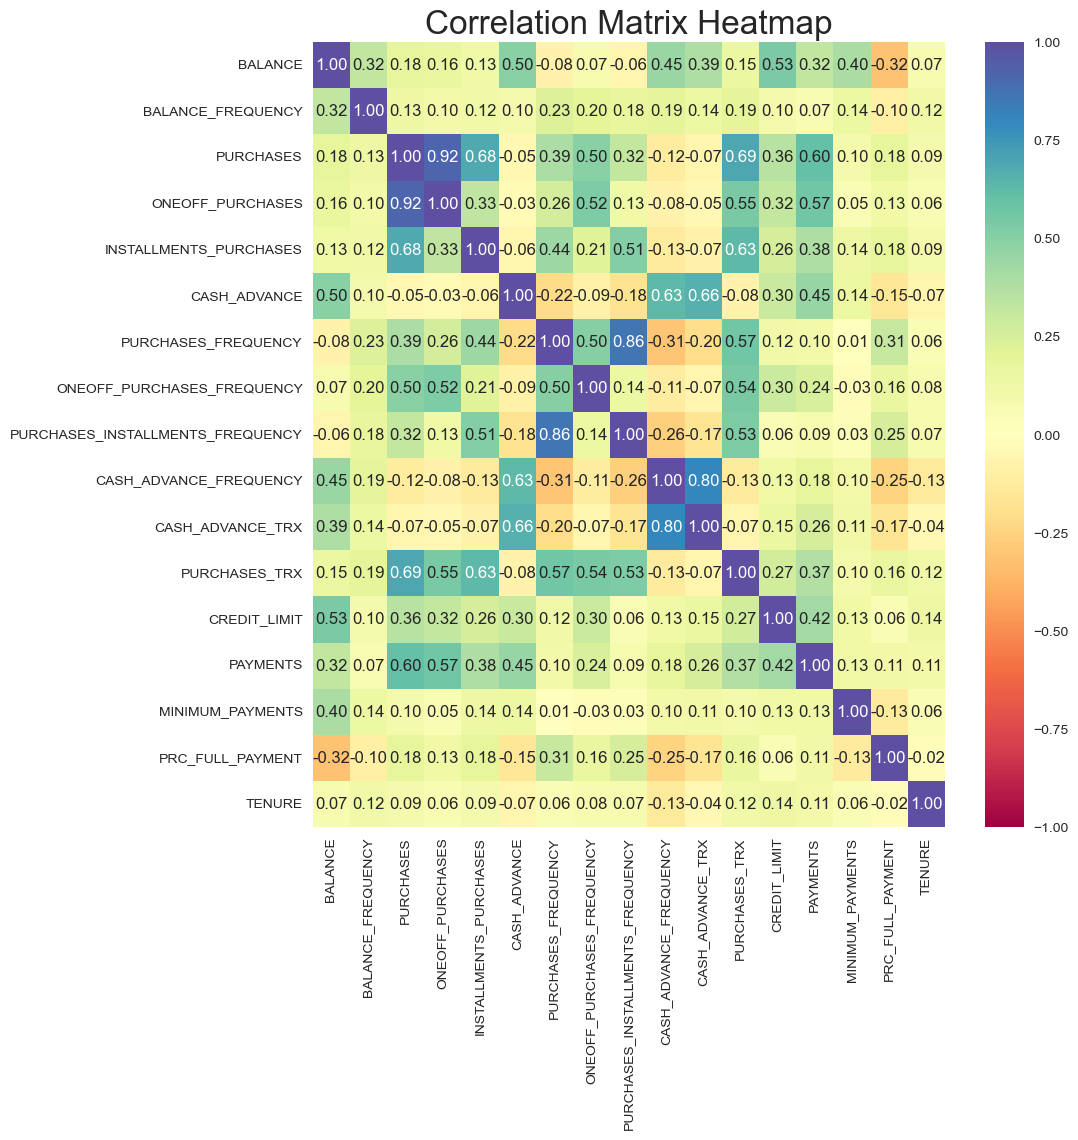

In [13]:
# Get a list of numeric columns
cols_list = df.select_dtypes(include=np.number).columns.tolist()

# Create the correlation matrix
correlation_matrix = df[cols_list].corr()

# Set the size of the plot based on the number of columns
plt.figure(figsize=(len(cols_list) * 0.6, len(cols_list) * 0.6))

# Plot the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral"
)

plt.title('Correlation Matrix Heatmap', fontsize=24)

# Save the plot as a PNG file
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

plt.show()


In [14]:
# print out correlation matrix results

print(df[cols_list].corr())

                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT

# Correlation Matrix
*******************
In a correlation matrix, values range from -1.0 to 1.0, and they indicate the strength and direction of the linear relationship between pairs of variables. Here's what different values represent:

## Positive Correlation (Close to 1.0):

A value close to 1.0 indicates a strong positive correlation between the two variables.
This means that as one variable increases, the other variable tends to increase as well.
For example, a correlation coefficient of 0.8 would suggest a strong positive linear relationship.


## No Correlation (Close to 0.0):

A value close to 0.0 suggests little to no linear relationship between the two variables.
This means that changes in one variable are not associated with changes in the other variable.
For example, a correlation coefficient of 0.1 would indicate a weak positive or negative linear relationship, or essentially no relationship at all.


## Negative Correlation (Close to -1.0):

A value close to -1.0 indicates a strong negative correlation between the two variables.
This means that as one variable increases, the other variable tends to decrease.
For example, a correlation coefficient of -0.9 would suggest a strong negative linear relationship.
In summary, the sign (+ or -) indicates the direction of the relationship (positive or negative), and the absolute value indicates the strength of the relationship (from weak to strong).



## Results from Correlation Matrix
1. `BALANCE`: It has a moderate positive correlation with features like CASH_ADVANCE (0.50) and CREDIT_LIMIT (0.53), indicating that as the balance increases, the amount of cash advances and credit limits also tend to increase.
2. `PURCHASES`: It has moderate positive correlations with ONEOFF_PURCHASES (0.92) and INSTALLMENTS_PURCHASES (0.68), suggesting that there is a strong tendency for individuals to make purchases in either one-off transactions or installments. It also has positive correlations with PAYMENTS (0.60) and PURCHASES_TRX (0.69).
3. `CASH_ADVANCE`: It has a moderate positive correlation with CASH_ADVANCE_FREQUENCY (0.63) and CASH_ADVANCE_TRX (0.66), indicating that individuals who use cash advances more frequently tend to have higher cash advance transaction counts.
4. `PURCHASES_FREQUENCY`: It has positive correlations with PURCHASES_INSTALLMENTS_FREQUENCY (0.86) and PURCHASES_TRX (0.57), indicating that individuals who make purchases more frequently also tend to make purchases in installments and have a higher number of purchase transaction5. `CREDIT_LIMIT`: It has moderate positive correlations with PAYMENTS (0.42), PURCHASES_TRX (0.27), and BALANCE (0.53), suggesting that individuals with higher credit limits tend to make more payments, have more purchase transactions, and carry higher balances.

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

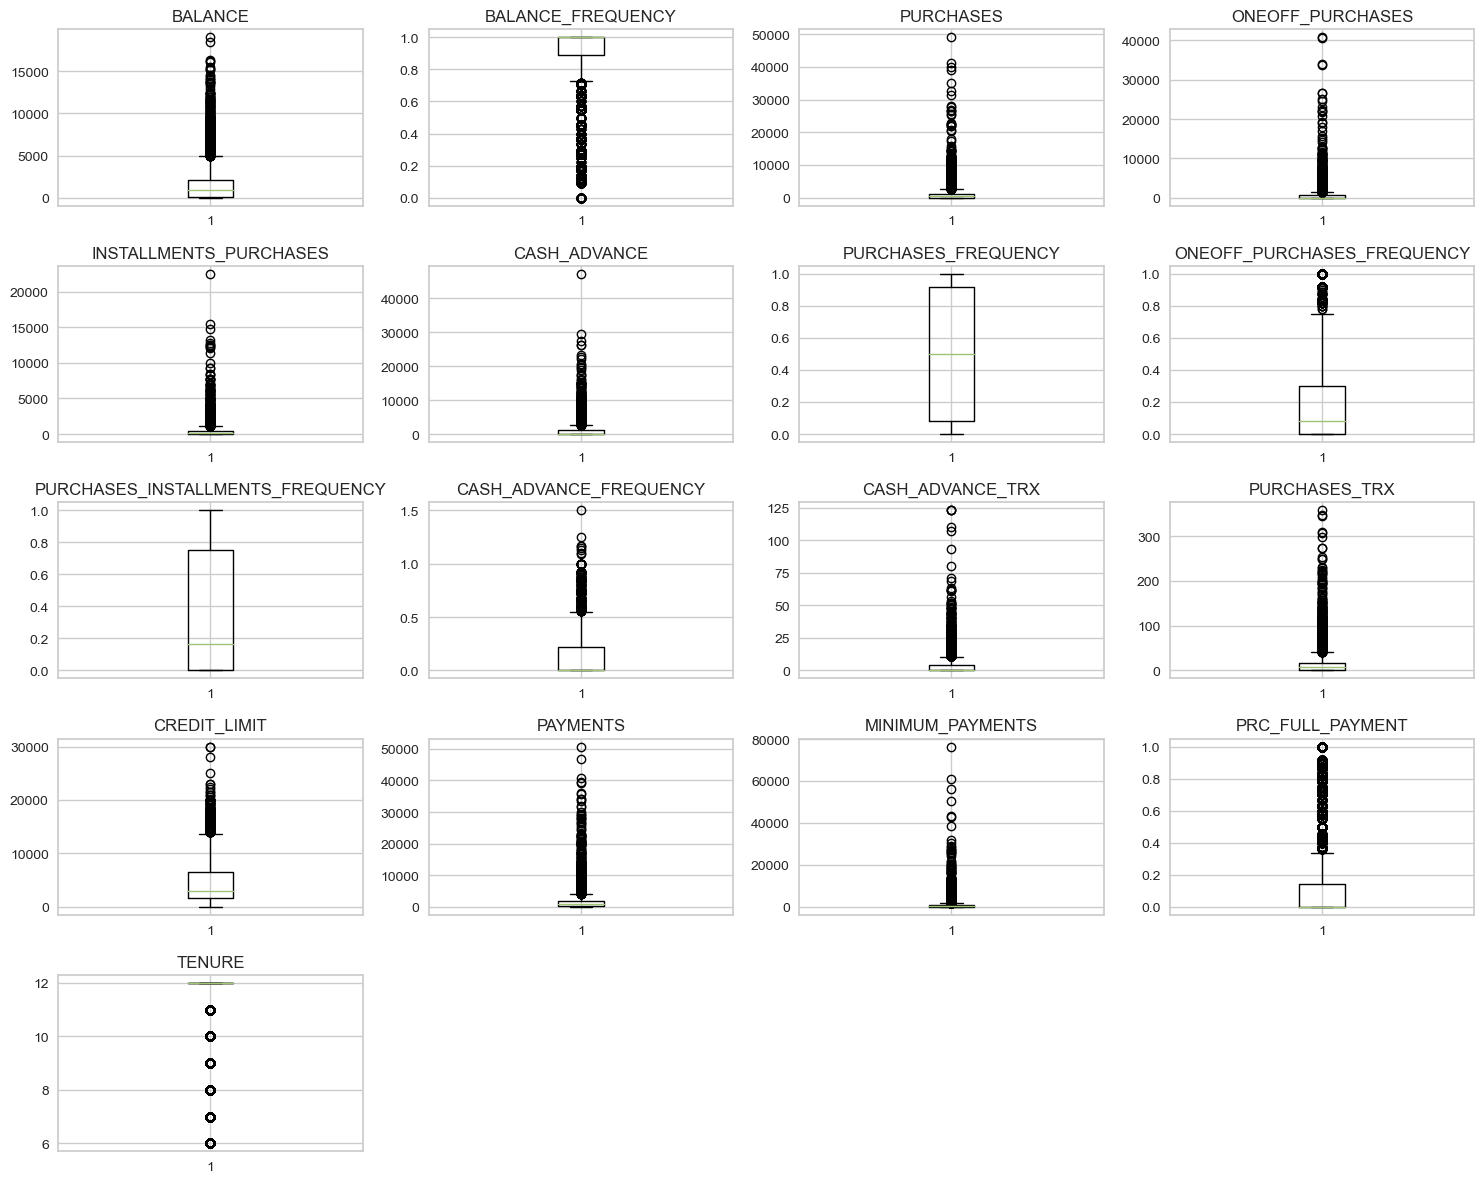

In [15]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
num_variables = len(numeric_columns)
num_rows = (num_variables - 1) // 4 + 1  # Calculate the number of rows needed

for i, variable in enumerate(numeric_columns):
    plt.subplot(num_rows, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


## Observations

- There are some outliers in the data.
- We will not treat them as they are proper values.

### Scaling

- Let's scale the data before we proceed with clustering.

In [16]:
# Identify numeric column names
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numeric column names:")
print(numeric_columns)


Numeric column names:
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [17]:
# Create a subset of the numeric columns
subset = df[numeric_columns].copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric columns
subset_scaled = scaler.fit_transform(subset)

# Now 'subset_scaled' contains the scaled values
print(subset_scaled)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.2973097  -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.10204243  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.08848934 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.32175099  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.33316552  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.31923775 -0.52555097
  -4.12276757]]


In [18]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

In [19]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 3.5251013637368334
Number of Clusters: 2 	Average Distortion: 3.144616050885138
Number of Clusters: 3 	Average Distortion: 3.027987650653708
Number of Clusters: 4 	Average Distortion: 2.818794411617878
Number of Clusters: 5 	Average Distortion: 2.716898426043283
Number of Clusters: 6 	Average Distortion: 2.563064958579577
Number of Clusters: 7 	Average Distortion: 2.467267398497041
Number of Clusters: 8 	Average Distortion: 2.4133513805275633
Number of Clusters: 9 	Average Distortion: 2.379520365491294
Number of Clusters: 10 	Average Distortion: 2.3333855176556266
Number of Clusters: 11 	Average Distortion: 2.2632509266949903
Number of Clusters: 12 	Average Distortion: 2.2247688056630626
Number of Clusters: 13 	Average Distortion: 2.1914777655362334
Number of Clusters: 14 	Average Distortion: 2.1496996227157097


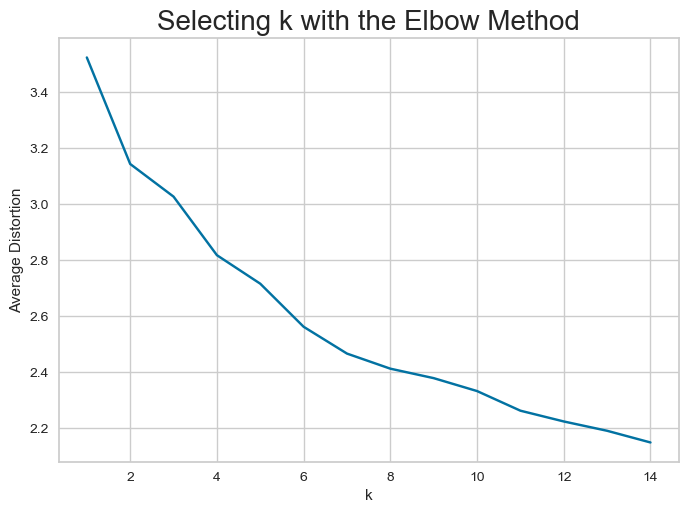

In [20]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

# Save the plot as a PNG file
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')

plt.show()

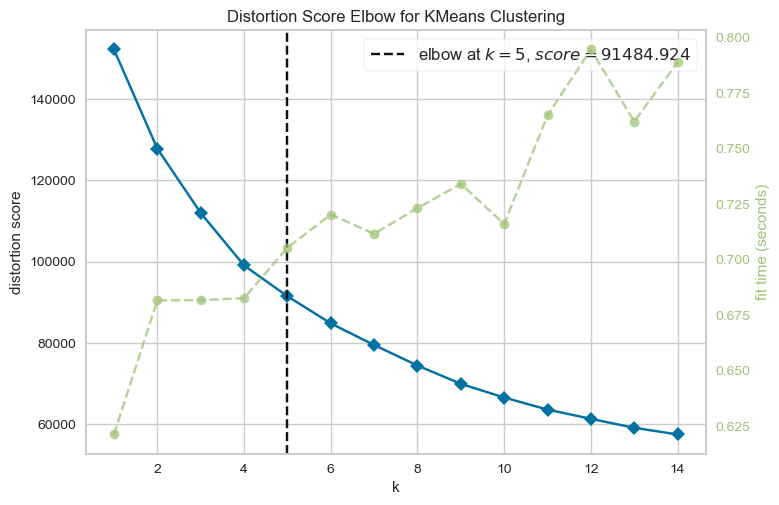

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer

# Save the plot as a PNG file
visualizer.show(outpath="elbow_visualizer.png")  # finalize and render figure

visualizer.show()  # finalize and render figure

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.20987578623163752)
For n_clusters = 3, the silhouette score is 0.250989710327758)
For n_clusters = 4, the silhouette score is 0.1976760935247528)
For n_clusters = 5, the silhouette score is 0.19309917954675093)
For n_clusters = 6, the silhouette score is 0.20278041521596568)
For n_clusters = 7, the silhouette score is 0.21521232683047722)
For n_clusters = 8, the silhouette score is 0.2216933947088189)
For n_clusters = 9, the silhouette score is 0.22644971948711543)
For n_clusters = 10, the silhouette score is 0.22025653943857887)
For n_clusters = 11, the silhouette score is 0.2165935065995286)
For n_clusters = 12, the silhouette score is 0.2164958410392218)
For n_clusters = 13, the silhouette score is 0.21910568939854938)
For n_clusters = 14, the silhouette score is 0.22124394115301937)


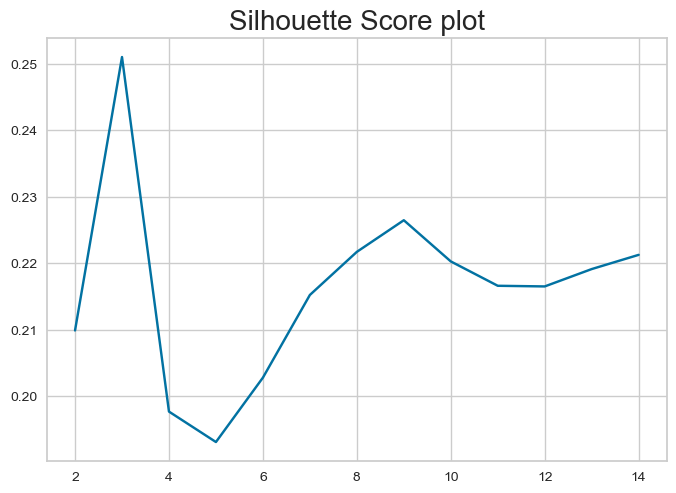

In [22]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

plt.title("Silhouette Score plot", fontsize=20)

# Save the plot as a PNG file
plt.savefig('silhouette_scores.png', dpi=300, bbox_inches='tight')

plt.show()

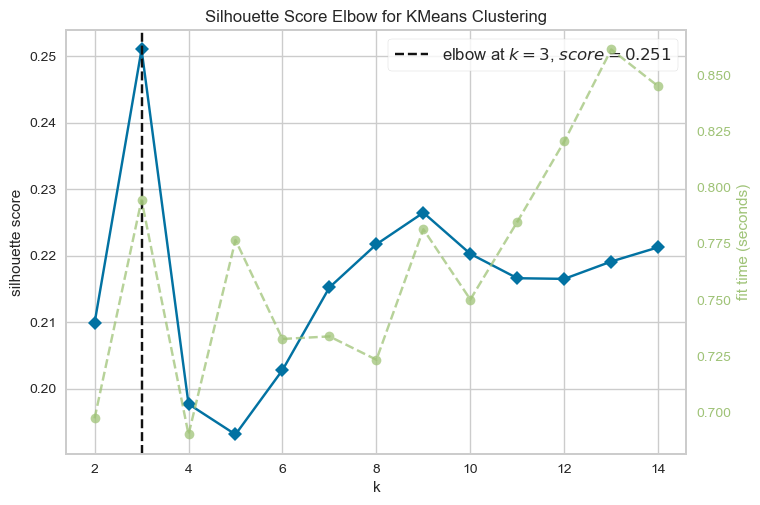

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer

# Save the figure as a PNG file
visualizer.show(outpath="elbow_visualizer_silhouette.png") 

visualizer.show()  # finalize and render figure

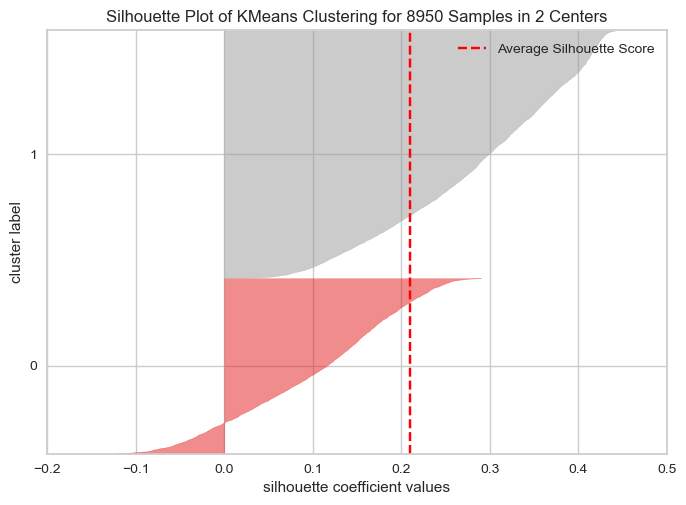

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

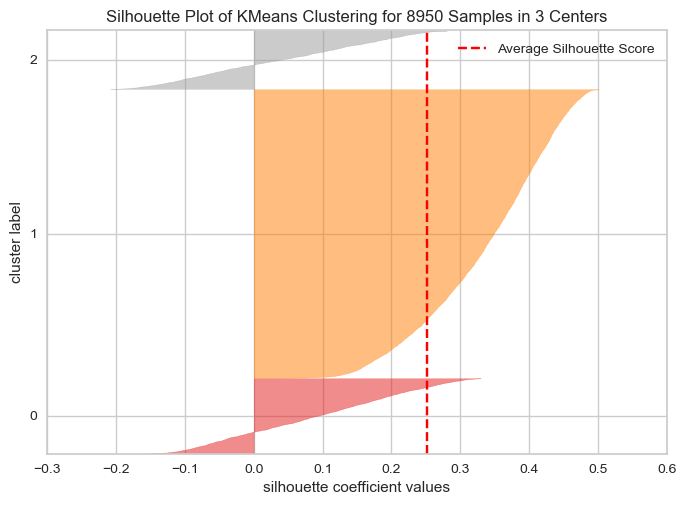

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

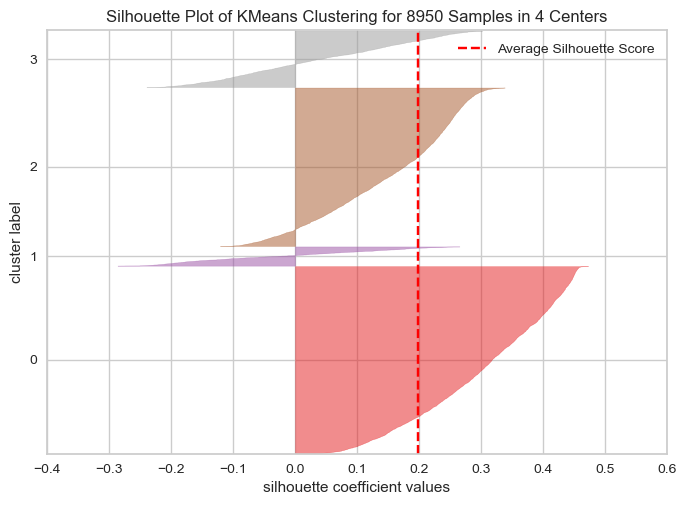

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

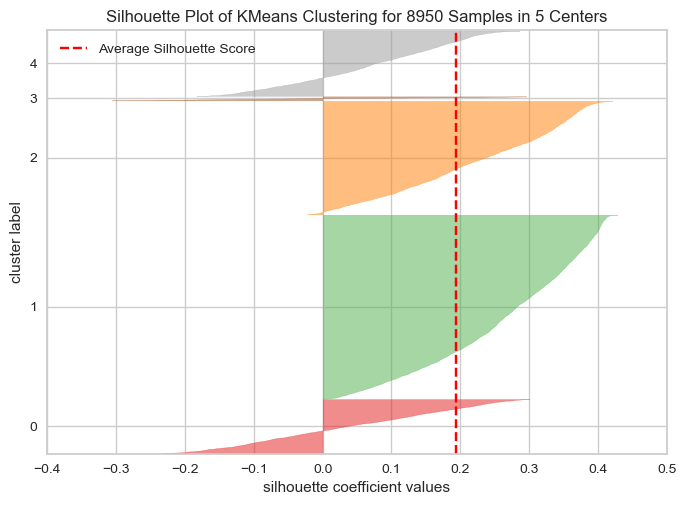

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

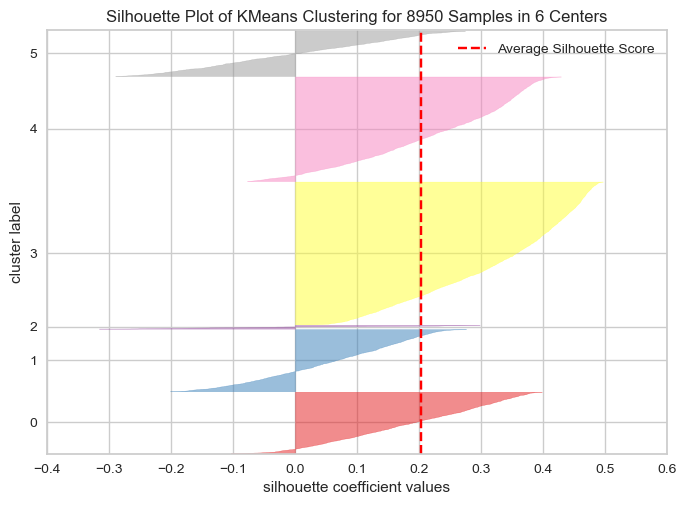

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Observations**

- For 3 clusters, there is a nick in the elbow plot and the silhouette score is high too.
- So, we will move ahead with k=3.

In [29]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [30]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiles

In [31]:
# km_cluster_profile = df1.groupby("KM_segments")

In [32]:
# Convert relevant columns to numeric data types
df1_numeric = df1.apply(pd.to_numeric, errors='coerce')

# Group by "KM_segments" and calculate the mean for each group
km_cluster_profile = df1_numeric.groupby("KM_segments").mean()

# Convert the result into a DataFrame
km_cluster_profile = km_cluster_profile.reset_index()

# Rename the column for clarity
km_cluster_profile = km_cluster_profile.rename(columns={"CUST_ID": "mean_in_each_segment"})

# Group by "KM_segments" and count the number of occurrences of each segment
count_in_each_segment = df1.groupby("KM_segments")["CUST_ID"].count()

# Convert the result into a DataFrame
count_in_each_segment = count_in_each_segment.reset_index()

# Rename the count column for clarity
count_in_each_segment = count_in_each_segment.rename(columns={"CUST_ID": "count_in_each_segment"})

# Merge the mean and count information with km_cluster_profile
km_cluster_profile = km_cluster_profile.merge(count_in_each_segment, on="KM_segments")

# Now km_cluster_profile will have the mean values and count of "CUST_ID" for each segment
print(km_cluster_profile)


   KM_segments  mean_in_each_segment      BALANCE  BALANCE_FREQUENCY  \
0            0                   NaN  4003.436644           0.959426   
1            1                   NaN   799.544718           0.834946   
2            2                   NaN  2215.220739           0.981447   

     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0   388.213323        249.775415              138.515590   3868.984912   
1   505.030433        252.927295              252.423621    332.989361   
2  4271.967762       2721.404972             1551.049408    455.728015   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.234287                    0.111117   
1             0.464548                    0.132285   
2             0.949145                    0.668979   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.146280                0.447732         12.405779   
1                          0.344644

In [33]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["CUST_ID"].count().values
)

In [34]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,KM_segments,mean_in_each_segment,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,count_in_each_segment
0,0,nan,4003.436644,0.959426,388.213323,249.775415,138.515590,3868.984912,0.234287,0.111117,0.146280,0.447732,12.405779,5.665201,6695.009137,3019.505258,1788.400373,0.033126,11.355528,1592
1,1,nan,799.544718,0.834946,505.030433,252.927295,252.423621,332.989361,0.464548,0.132285,0.344644,0.068478,1.217143,8.643592,3270.787524,911.012306,508.585882,0.155788,11.477714,6125
2,2,nan,2215.220739,0.981447,4271.967762,2721.404972,1551.049408,455.728015,0.949145,0.668979,0.744440,0.062710,1.518248,56.522303,7728.142741,4156.232548,1218.110287,0.299116,11.922952,1233


In [35]:
# let's see the names of the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following customers are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["CUST_ID"].unique())
    print()

In cluster 1, the following customers are present:
['C10001' 'C10003' 'C10004' ... 'C19188' 'C19189' 'C19190']

In cluster 0, the following customers are present:
['C10002' 'C10016' 'C10024' ... 'C19156' 'C19158' 'C19182']

In cluster 2, the following customers are present:
['C10007' 'C10013' 'C10022' ... 'C18944' 'C18975' 'C19097']



In [36]:
df1.groupby(["KM_segments", "PURCHASES_TRX"])['TENURE'].count()

KM_segments  PURCHASES_TRX
0            0                809
             1                108
             2                 81
             3                 56
             4                 53
                             ... 
2            308                1
             309                1
             344                1
             347                1
             358                1
Name: TENURE, Length: 296, dtype: int64

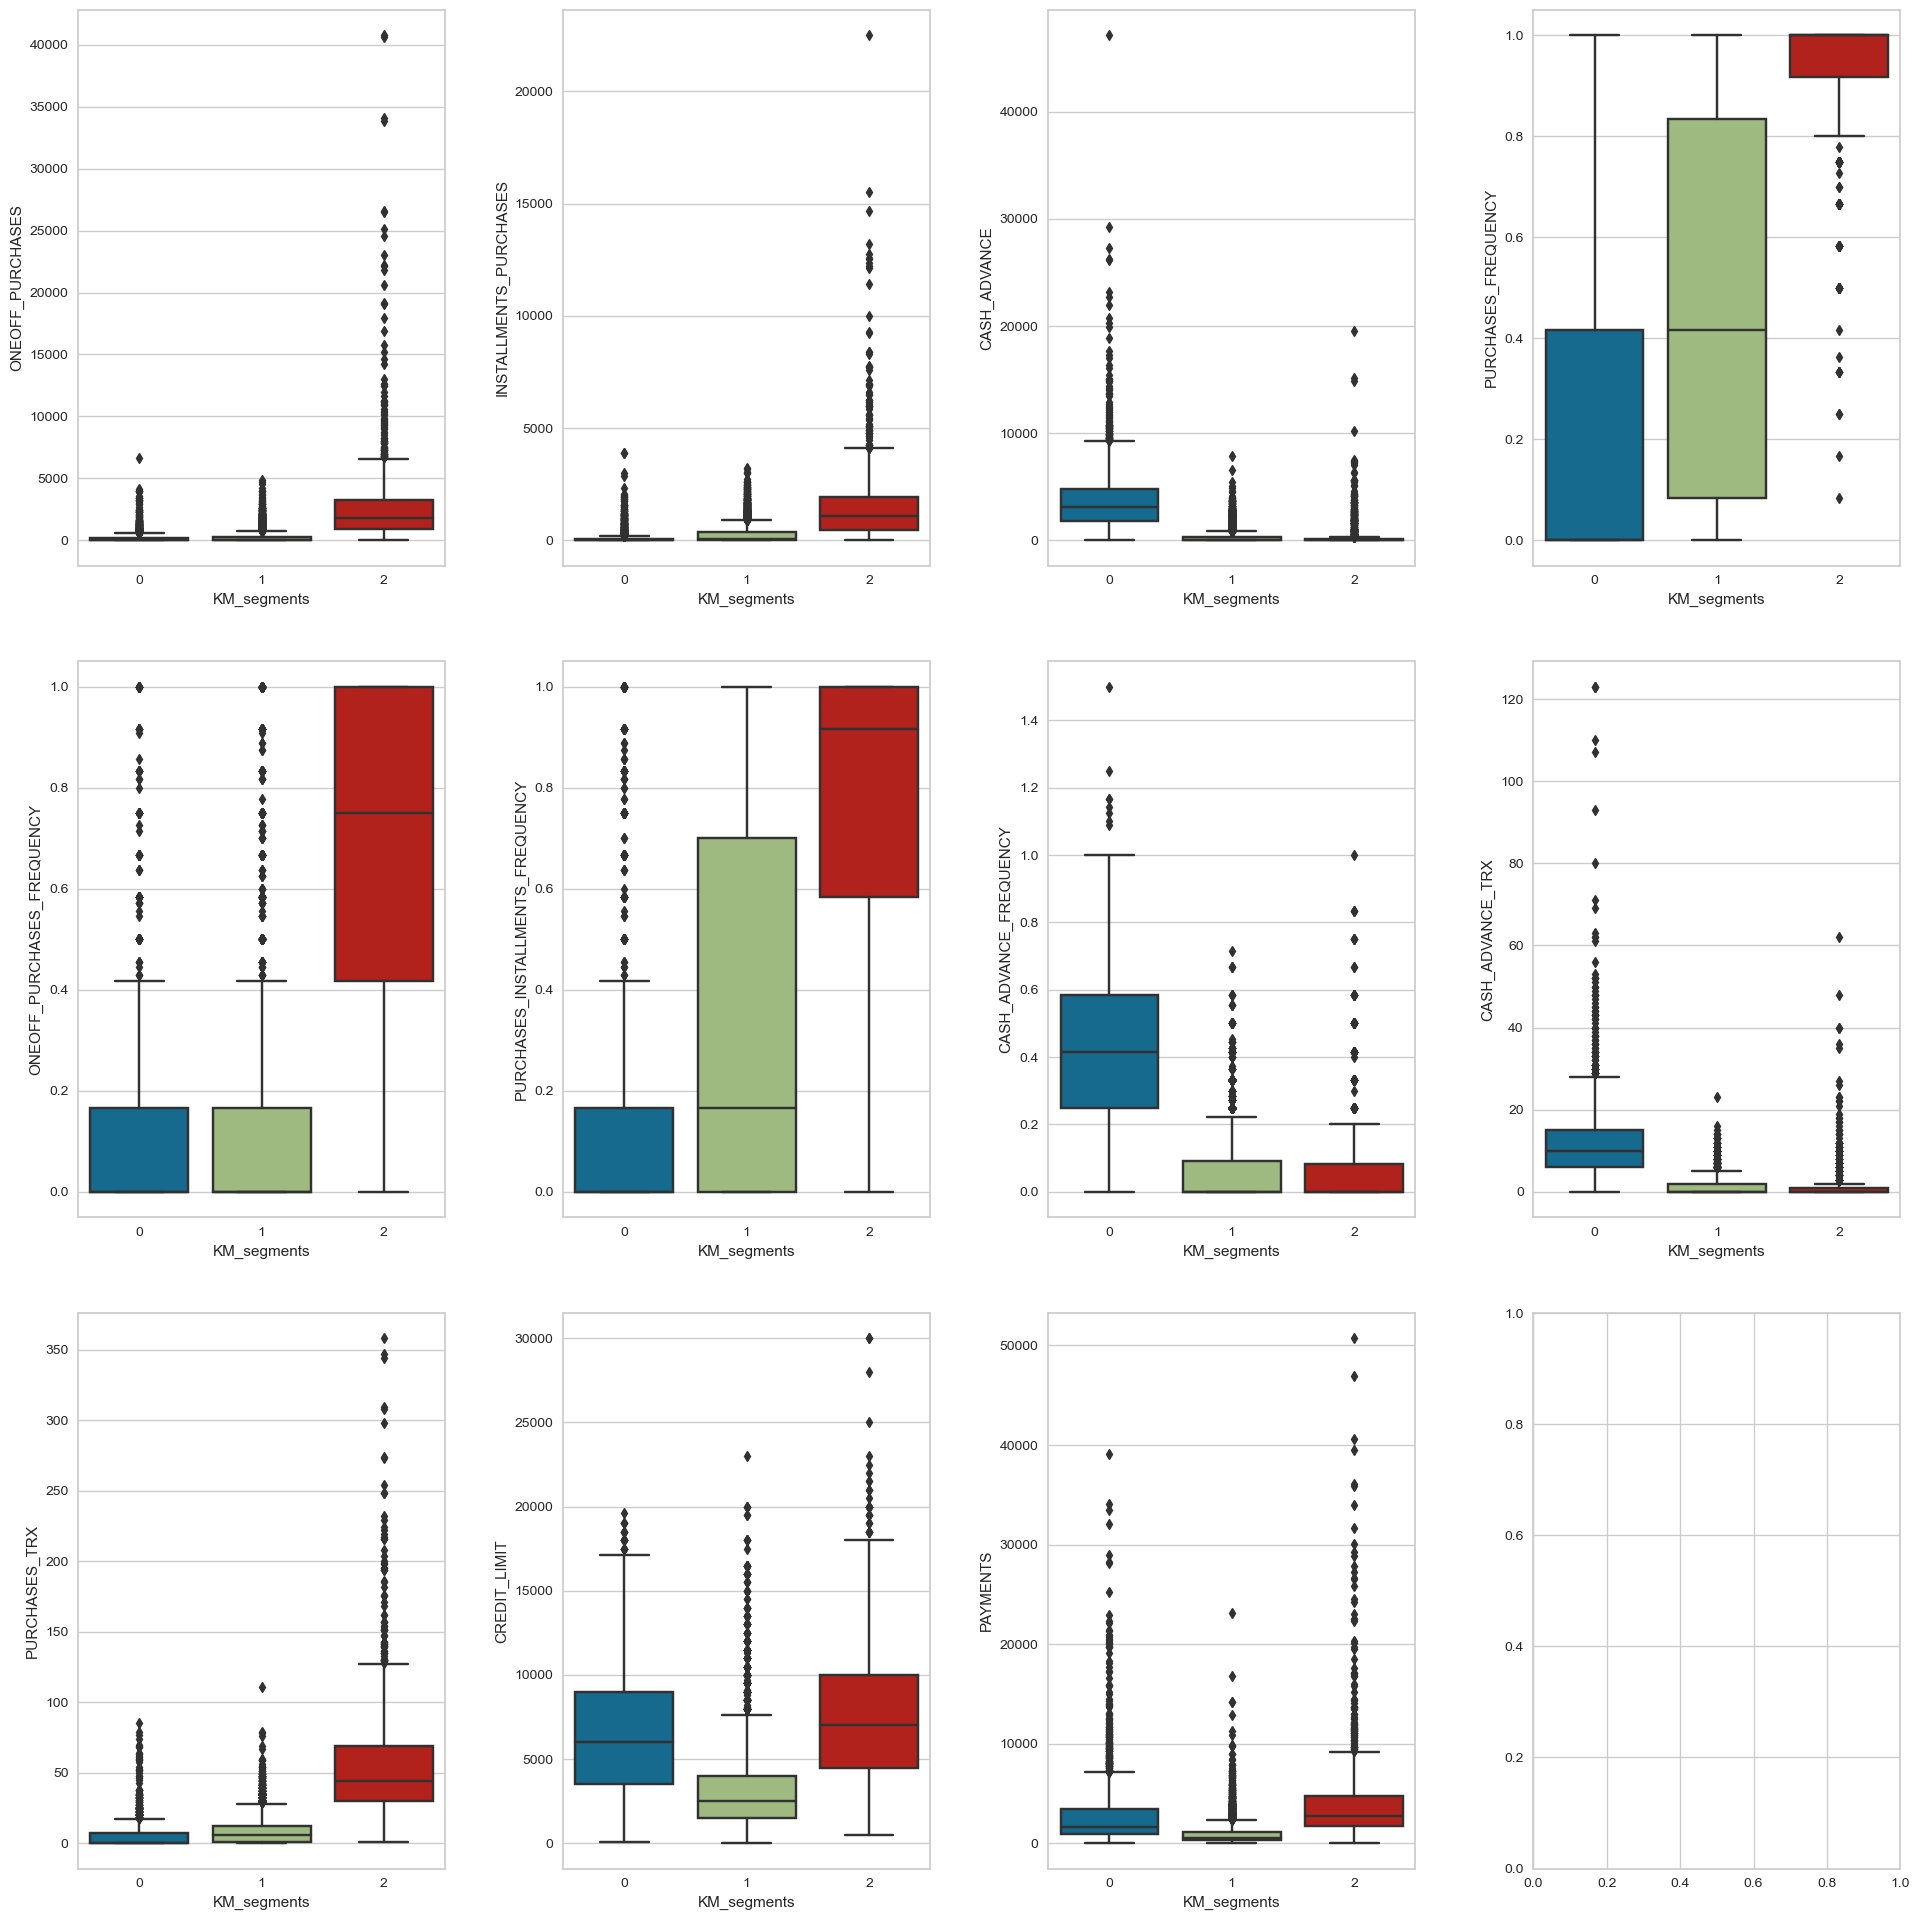

In [37]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

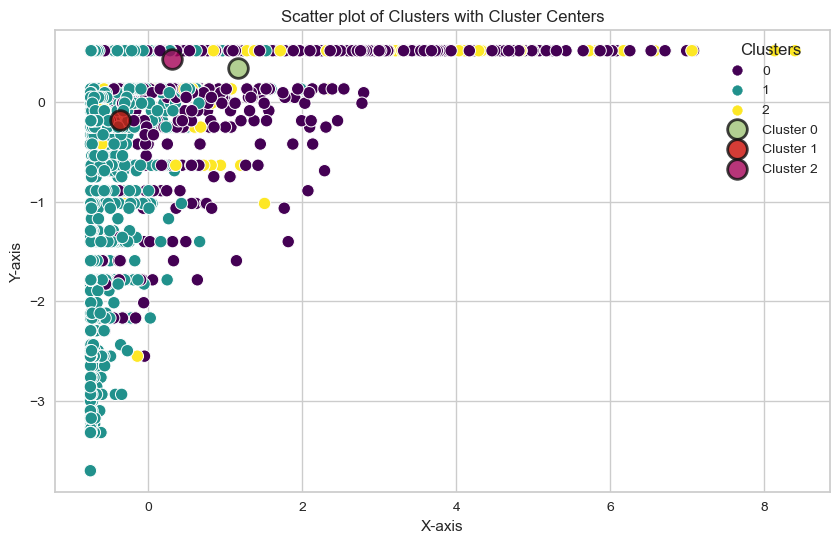

In [38]:
plt.figure(figsize=(10, 6))

# Scatter plot for the clusters
sns.scatterplot(
    x=k_means_df.iloc[:, 0],
    y=k_means_df.iloc[:, 1],
    hue=kmeans.labels_,
    palette='viridis',
    legend='full',
    s=80
)

# Scatter plot centers with enhanced distinguishability
centers = kmeans.cluster_centers_
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], s=200, alpha=0.8, label=f'Cluster {i}', edgecolors='k', linewidths=2)

plt.title('Scatter plot of Clusters with Cluster Centers')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend(title='Clusters', loc='upper right')

# Save the plot as a PNG file
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')

plt.show()


**Observations**

- Cluster 0 has the closest data points around the center, followed by cluster 2 and then cluster 1

### CLUSTER SUMMARY

- **Cluster 0**
    * There are 1592 customers in this cluster.
    * Highest balance amount left in their account to make purchase - `BALANCE`.
    * Highest minimum payments - `MINIMUM_PAYMENTS`.
    * Highest number of transactions made with cash in advance - `CASHADVANCETRX`.
    * Higest frequency of cash in advance been paid - `CASHADVANCEFREQUENCY`.
    * Highest cash in advance - `CASH_ADVANCE`.
    * Lowest `TENURE`.
    * Lowest percent of full payment paid by user - `PRCFULLPAYMENT`.
    * Lowest Number of purchase transactions made - `PURCHASES_TRX`.
    * Lowest purchases installments frequency - `PURCHASES_INSTALLMENTS_FREQUENCY`.
    * Lowest installments purchase - `INSTALLMENTS_PURCHASES`.
    * Lowest one off purchases - `ONEOFF_PURCHASES`.
    * Lowest purchases made froma account- `PURCHASES`.nding shares.

### Insights

- **Cluster 1**
    * There are 6125 customers in this cluster. **(the largest number of customers - key focus cluster)**
    * Highest `TENURE`.
    * Lowest minimum payments - `MINIMUM_PAYMENTS`.
    * Lowest `PAYMENTS`
    * Lowest `CREDIT_LIMIT`
    * Lowest `CASH_ADVANCE_TRX`
    * Lowest `CASH_ADVANCE`
    * Lowest `BALANCE_FREQUENCY`
    * Lowest `BALANCE`

### Insights

- **Cluster 2**
    * There are 1233 customers in this cluster. {the lowest number of customers}
    * Highest `TENURE`.
    * Highest `PRC_FULL_PAYMENT`
    * Highest `PURCHASES_TRX`	
    * Highest `CREDIT_LIMIT`	
    * Highest `PAYMENTS`
    * Highest `PURCHASES_FREQUENCY`	
    * Highest `ONEOFF_PURCHASES_FREQUENCY`	
    * Highest `PURCHASES_INSTALLMENTS_FREQUENCY`
    * Highest `BALANCE_FREQUENCY`	
    * Highest `PURCHASES`	
    * Highest `ONEOFF_PURCHASES`	
    * Highest `INSTALLMENTS_PURCHASES`

## Actionable Insights and Recommendations

- **Cluster 0** comprising of 1592 customers, is characterized by high balances (`BALANCE`), high minimum payments (`MINIMUM_PAYMENTS`), and a high number of transactions made with cash in advance (`CASHADVANCETRX`). These customers also exhibit a high frequency of cash advances (`CASHADVANCEFREQUENCY`) and high cash advances (`CASH_ADVANCE`). On the other hand, this cluster has the lowest `TENURE`, indicating a shorter duration of relationship with the bank. They also have the lowest percent of full payment (`PRCFULLPAYMENT`), suggesting they often carry a balance. In terms of purchases, this cluster shows the lowest number of purchase transactions (`PURCHASES_TRX`), lowest frequency of purchases installments (`PURCHASES_INSTALLMENTS_FREQUENCY`), lowest installments purchases (`INSTALLMENTS_PURCHASES`), lowest one-off purchases (`ONEOFF_PURCHASES`), and lowest total purchases (`PURCHASES`). This suggests that these customers are less engaged in purchasing activities. In summary, customers in Cluster 0 tend to maintain high balances and engage frequently in cash advance activities, but show lower engagement in purchasing activities and have shorter relationships with the bank. They also tend to carry a balance rather than paying their bills in full.


- **Cluster 1** with 6125 customers, is the largest cluster and a key focus for the business. These customers have the highest `TENURE`, indicating a longer duration of relationship with the financial institution.  However, they exhibit the lowest values in several financial metrics. They have the lowest minimum payments (`MINIMUM_PAYMENTS`), suggesting they have less financial burden in terms of their credit card bills. They also have the lowest total payments (`PAYMENTS`), lowest credit limit (`CREDIT_LIMIT`), and lowest number of cash advance transactions (`CASH_ADVANCE_TRX`). Furthermore, these customers have the lowest cash advance (`CASH_ADVANCE`), indicating less reliance on cash advances.  In terms of account activity, this cluster shows the lowest balance frequency (`BALANCE_FREQUENCY`) and the lowest balance (`BALANCE`), suggesting lower account activity and balances.  In summary, customers in Cluster 1 have a long-standing relationship with the bank but exhibit lower financial activity and balances. They have less reliance on cash advances and maintain lower balances, suggesting a more cautious financial behavior.


- **Cluster 2** with 1233 customers, is the smallest cluster. These customers have the highest `TENURE`, indicating a long-standing relationship with the financial institution.  Financially, these customers exhibit the highest percentage of full payment (`PRC_FULL_PAYMENT`), suggesting they often pay their bills in full. They also have the highest credit limit (`CREDIT_LIMIT`) and make the highest total payments (`PAYMENTS`).  In terms of purchasing behavior, this cluster shows the highest number of purchase transactions (`PURCHASES_TRX`), highest frequency of purchases (`PURCHASES_FREQUENCY`), highest frequency of one-off purchases (`ONEOFF_PURCHASES_FREQUENCY`), and highest frequency of installment purchases (`PURCHASES_INSTALLMENTS_FREQUENCY`). These customers also have the highest total purchases (`PURCHASES`), highest one-off purchases (`ONEOFF_PURCHASES`), and highest installment purchases (`INSTALLMENTS_PURCHASES`), indicating a high level of purchasing activity.  In summary, customers in Cluster 2 have a long-standing relationship with the bank, are diligent in paying their bills, and are highly active in making purchases. Despite being the smallest cluster, they represent a highly engaged and financially responsible customer segment.